In [1]:
import json
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def load_json_sample(path):
    with open(path, encoding='utf-8') as json_file:
        return json.load(json_file)

In [3]:
def daily_data_of_attributes(json_dict, attributes):
    daily_attributes = {}
    for attr in attributes:
        daily_attributes[attr] = []
    daily_data = json_dict["daily"]["data"]
    try:
        for dict_data in daily_data:
            for attr in attributes:
                daily_attributes[attr].append(dict_data[attr])
    except KeyError:
        print("Key Not Found")
        return {}
    return daily_attributes

In [4]:
def request_data():
    # LA 37.8267,-122.4233 , beijing 39.904200, 116.407396 ,Heifei 31.83,117.25 
    lat = 31.83
    long = 117.25 
    api_key = "62bf94de3c232f30f6f3ee5bb534c2f3"
    url = "https://api.darksky.net/forecast/%s/%s,%s?units=si" % (api_key, lat, long)
    response = requests.get(url)
    return json.loads(response.text)

In [5]:
def get_daily_data(remote=False):
    if remote:
        json_obj = request_data()
    else:
        json_obj = load_json_sample('sample.json')
#    pretty_print_dict_of_list(json_obj)
    attributes = ['temperatureMin', 'temperatureMax', 'humidity','summary']
    daily_data = daily_data_of_attributes(json_obj, attributes)
    return daily_data

In [6]:
def pretty_print_dict_of_list(d):
    indent = 4
    print("{")
    for k, l in d.items():
        print(indent * " " + k + ": ", end="")
        print(l)
    print("}")

In [7]:
daily_data = get_daily_data(True)
pretty_print_dict_of_list(daily_data)

{
    temperatureMin: [11.42, 10.08, 13.14, 14.17, 14.74, 13.59, 8.16, 6.32]
    temperatureMax: [21.95, 22.12, 25.9, 27.93, 30.29, 23.1, 14.34, 13.68]
    humidity: [0.57, 0.56, 0.54, 0.58, 0.56, 0.44, 0.7, 0.75]
    summary: ['Mostly cloudy throughout the day.', 'Mostly cloudy throughout the day.', 'Mostly cloudy starting in the afternoon.', 'Mostly cloudy until evening.', 'Clear throughout the day.', 'Breezy and overcast throughout the day.', 'Breezy until evening and light rain until afternoon.', 'Mostly cloudy until evening.']
}


In [8]:
df = pd.DataFrame(daily_data)

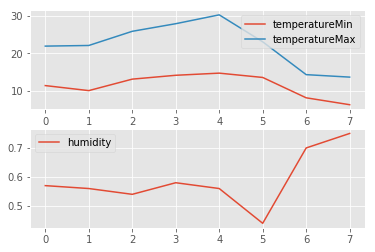

In [9]:
df_temperature = df[["temperatureMin", "temperatureMax"]]
df_humidity = df[["humidity"]]
# Plot data
plt.style.use('ggplot')
_, axes = plt.subplots(nrows=2)
df_temperature.plot(ax=axes[0])
df_humidity.plot(ax=axes[1])
plt.show()

In [10]:
def next_week_weather():
    daily_dark_data = get_daily_data(True)
    df_dark = pd.DataFrame(daily_dark_data)
    df_dark_temperature = df_dark[["temperatureMin", "temperatureMax"]]
    df_dark_humidity = df_dark[["humidity"]]

    # Plot data
    plt.style.use('ggplot')
    _, axes = plt.subplots(nrows=2)
    df_dark_temperature.plot(ax=axes[0])
    df_dark_humidity.plot(ax=axes[1])
    plt.show()

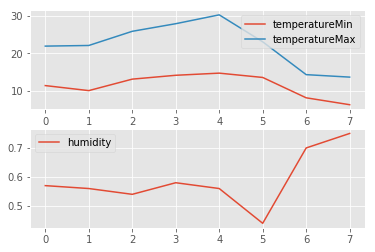

In [11]:
next_week_weather()